In [1]:
from IPython.core.display import HTML
HTML("""
<style>
div.text_cell_render { /* Customize text cells */
font-family: 'Times New Roman';
font-size:1.3em;
line-height:1.4em;
padding-left:1.5em;
padding-right:1.5em;
}
</style>
""")

<h1><center>Tree-Based Methods</center></h1>

<b>Tree-based</b> methods <b>stratify</b> or <b>segment</b> the predictor space into a number of simple regions. To make a prediction, we use the <b>mean</b> or the <b>mode</b> of the training observations in the region in which the observation to be predicted belongs. The set of splitting rules can be summarized via a tree, these methods are also known as <b>decision tree</b> methods. <b>Bagging, random forests</b> and <b>boosting</b> produce multiple trees and then combine them in a single model to make the prediction. They provide improved accuracy at the cost of interpretability.

### 8.1 The Basics of Decision Trees
#### 8.1.1 Regression Trees
##### Predicting Baseball Players’ Salaries Using Regression Trees

The regression tree which predicts the salary of baseball players is shown below. Regression tree consists of a series of splitting rules and stratifies or segments the players into three regions :

$$R_1 = \{X \ | Years < 4.5\}$$

$$R_2 = \{X \ | Years \geq 4.5, Hits < 117.5\}$$

$$R_3 = \{X \ | Years \geq 4.5, Hits \geq 117.5\}$$

<img src="images/decision_tree.PNG"  width="500px">

The regions $R_1, R_2, R_3$ are known as <b>terminal nodes</b> or <b>leaves</b>. The points along the tree where the predictor space is split is called as <b>internal nodes</b>. The segments of the tree which connect the nodes are called <b>branches</b>. Regression trees are easier to interpret.

##### Prediction via Stratification of the Feature Space

The regression tree can be build by:

 -  Dividing the predictor space $X_1, X_2, ..., X_p$ into $J$ <b>distinct</b> and <b>non-overlapping</b> regions $R_1, R_2, ..., R_J$.
 
 - Every observation that falls into region $R_j$, the prediction is simply the mean of the training observations in the region.
 
Theoretically, the regions can have any shape. In practice, the regions are divided into high dimensional rectangles for simplicity and ease of interpretation. The goal is to find the regions $R_1, R_2, ..., R_J$ that minimizes

$$\sum_{j=1}^{J}\sum_{i \in R_j} (y_i - \widehat{y_{R_j}})^2$$

where $\widehat{y_{R_j}}$ is the <b>mean</b> of the training observation in the $j$th box. Predictors are split into regions by <b>top-down greedy approach</b> which is known as <b>recursive binary splitting</b>.

In recursive binary splitting, we first select a predictor $X_j$ and a <b>cutpoint</b> $s$, such that splitting the predictor space into region $\{X|X_j < s\}$ and $\{X|X_j \geq s\}$ leads to the greatest possible reduction in RSS. We consider all possible predictors $X_1, X_2, ..., X_p$, and all possible cutpoints $s$ for each of the predictors and then choose the predictor and cutpoint that leads to lowest possible RSS. To be more specific, for any $j$ and $s$, the pair of half-planes are defined as:

$$R_1(j, s) = \{X|X_j < s\}$$

$$R_2(j, s) = \{X|X_j \geq s\}$$

and hence, we need to find the value of $j$ and $s$ which minimizes

$$\sum_{i: x_i \in R_1(j, s)} (y_i - \widehat{y_{R_1}})^2 + \sum_{i: x_i \in R_2(j, s)} (y_i - \widehat{y_{R_2}})^2$$

This process continues until a stopping criteria is reached (such as no regions contain more than 5 observations).

##### Tree Pruning

The process described above may lead to more complex trees and hence can result in overfitting. A smaller tree with fewer splits may lead to low variance and better at the cost of a little bias. One possible approach is to decide a threshold for decrease in RSS and split the tree only if that threshold is met. But there may be a case when seemingly worthless split early on may be followed by a good split that leads to a greater reduction in RSS. Hence a better approach is needed which build a large tree first and then <b>prune</b> it later to get a <b>subtree</b>. One way to prune the tree is by estimating test error for every possible subtrees (by crossvalidation) and then select the one which has the minimum test error. But this can be a cumbersome task as there can be a huge number of subtrees.

<b>Cost complexity pruning</b> or <b>weakest link pruning</b> instead considers a sequence of subtrees indexed by a nonnegative tuning parameter $\alpha$. For each value of $\alpha$, there exists a subtree $T \subset T_0$ such that

$$\sum_{m=1}^{|T|}\sum_{x_i \in R_m} (y_i - \widehat{y_{R_m}})^2 + \alpha \ \big|T \big|$$

is as small as possible. Here |T| indicates the number of inernal nodes in the tree T. The tuning parameter $\alpha$ controls the trade-off between the subtree's fit to the training data and complexity. When $\alpha = 0$, the the subtree T will be equal to the largest tree $T_0$. When $\alpha$ increases, the subtrees with larger number of internal nodes will be penalized giving a smaller subtree as the fit. If we increase $\alpha$ from 0, branches get pruned out from the tree in a <b>nested and predictable fashion</b> and hence this entire process is quite efficient. The algorithm is as follows:

 - <b>Step 1</b>: Use recursive binary splitting to obtain $T_0$.
 - <b>Step 2</b>: Use cost complexity pruning to obtain a sequence of best subtrees as a function of $\alpha$.
 - <b>Step 2</b>: Use K-fold crossvalidation and repeat Step 1 and 2 for all but the $k$th fold of the training data and obtain the validation MSE for the left-out $k$th fold for $k=1,2,3,...,K$. Finally pick $\alpha$ for whihc validation MSE is minimized.
 - <b>Step 4</b>: Return the subtree from Step 2 which corresponds to the chosen value of $\alpha$.
 
#### 8.1.2 Classification Trees

A <b>classification tree</b> is similar to a regression tree but instead of giving the mean of the regions as its prediction, it gives the <b>most commonly occuring class</b> of the training observations in the region as its prediction. For the interpretation purpose, in addition to the prediction, we may be interested in the <b>class proportions</b> for training observations in the regions as well.

Recursive binary spliiting can be used to build a classification tree as well. In a classification setting, we can not use RSS as a criterion for making the binary splits. Instead, we use <b>classification error rate</b>. Classification error for a region can be described as the fraction of the training observation that does not belong to the <b>most common class</b> for the region (mis-classified training observations). This can be given as:

$$E = 1 - max_k( \widehat{p}_{mk})$$

where $\widehat{p}_{mk}$ represents the proportion of the training observation in the $m$th region that belongs to the $k$th class. Classification error rate is not <b>sufficiently sensitive</b> for tree growing. <b>Gini index</b> is defined as:

$$G = \sum_{k=1}^{K} \widehat{p}_{mk}(1 - \widehat{p}_{mk})$$

is a measure of total variance across the $K$ classes. It can be observed that the Gini index takes a smaller value if all the $\widehat{p}_{mk}$ have values closer to 0 or 1. Hence, it can be viewed as a measure of <b>node purity</b>, as a small value of Gini index indicates that a node contains predominantly observations from a single class. Another measure is <b>cross-entropy</b>, which is given as:

$$D = - \sum_{k=1}^{K} \widehat{p}_{mk} log(\widehat{p}_{mk})$$

Cross-entroy has a similar behaviour as Gini index and they are quite similar numerically as well.

While building a tree, Gini index or Cross-entropy is used as the measure, as these measures are more sensitive to the node purity as compared to classification error rate. While <b>pruning</b>, classification error rate is preferred if  prediction accuracy is the final goal.

There may be a case that in the classification tree, some splits seem redundant. For example, a split may lead to two leaves which has the exact same prediction (left leaf: 7 out of 11 in class A, right leaft: 9 out of 9 in class A). This split is done to achieve higher <b>node purity</b>. It has the advantage that if we encounter an observation that belongs to the right leaf(9 out of 9 in class A), we can be quite certain that the observation will belong to class A. But for the case of the observation belonging to the left leaf, we are less certain.

#### 8.1.3 Trees Versus Linear Models

Simple linear models and regression tree models are quite different. Linear regression assumes a model of the form,

$$f(X) = \beta_0 + \sum_{j-1}^{p} X_j \beta_j$$

while regression trees have the form of

$$f(X) = \sum_{m=1}^{M}c_m \cdot 1_{(X \in R_m)}$$

If relationship between the response and the predictors is linear, the linear model will work better. If there is a more comlex relationship, decision trees may outperform classical approaches.

#### 8.1.4 Advantages and Disadvantages of Trees

Some of the advantages of decision tree approach is:

 - easy interpretability.
 - decision tree closely imitates the human decision-making process.
 - can be decribed graphically and can be easily interpreted by non-experts.
 - can easily handle qualitative variables (without making dummy variables).
 
Sometimes, decision tree aprooach may lead to lesser prediction accuracy though.

### 8.2 Bagging, Random Forests, Boosting

#### 8.2.1 Bagging

The decision trees discussed above suffers from a problem of <b>high variance</b>. <b>Bootstrap aggregation</b> or <b>bagging</b> is a procedure that reduces the variance of a statistical learning method.

Give a set of $n$ independent observation sets $Z_1, Z_2, ..., Z_n$, each with variance $\sigma^2$, the variance of the mean $\bar{Z}$ is given by $\sigma^2/n$, i.e. <b>averaging a set of observations reduces variance</b>. Hence, a natural way to reduce the variance of a statistical model is to take many training samples from the population, fit individual models on them, and give the average of them as the final model. Hence, we can calculate $\widehat{f}^1(x), \widehat{f}^2(x), ..., \widehat{f}^B(x)$ using $B$ seperate training sets, and finally obtain the low variance statistical model as:

$$\widehat{f}_{avg}(x) = \frac{1}{B} \sum_{b=1}^{B} \widehat{f}^b(x)$$

As we don't have access to different training sets, the above decribed process is not feasible. Instead, we can bootstrap, taking repeated samples from the same training set (sampling with replacement), and then take the average of the individual models as the final one

$$\widehat{f}_{bag}(x) = \frac{1}{B} \sum_{b=1}^{B} \widehat{f}^{*b}(x)$$

This procedure is called <b>bagging</b>. Bagging can improve the predictions of the decision trees dramatically. To apply bagging to regression trees, we construct $B$ regression trees (<b>not pruned</b>) using $B$ bootstrapped training sets and average them as the final predictions. Each individual tree has high variance and low bias and averaging them reduces the variance. In the case of qualitative response variable, the prediction can be decided by <b>majority vote</b>, the overall prediction is the most common occurring class among the $B$ predictions. The number of trees $B$ is not a critical parameter, as increasing $B$ will not lead to overfitting. A value of $B$ is choosen for which test error stabalizes (almost stops reducing).

##### Out-of-Bag Error Estimation

As it turns out that in the bootstrap procedure, each bagged tree uses only 2/3 of the observations. This can be proved as: The chance of a sample getting not selected is $1-1/n$, where $n$ is total number of samples. Hence, the probability of a sample not being selected in each draw is $(1-1/n)^n$. As $n \to \infty$, this value tends to $1/e$ which is $1/3$. These one-third of the samples which is not used to fit the given bagged tree is called as <b>out-of-bag (OOB)</b> observations.

Hence, the $i$th observation will be OOB in a total of $B/3$ trees. The prediction of the $i$th observation is the average of these $B/3$ predictions of the trees in which it is OOB. An OOB prediction can be obtained for each of the $n$ observations, from which the overall <b>OOB MSE</b> (for regression problem) or classification error rate (for classification problem) can be computed. This OOB error can serve as a valid estimate for the test error.

##### Variable Importance Measures

Bagging improves the prediction accuracy but the interpretation of the resulting model is quite difficult. Hence, bagging improves prediction accuracy at the expense of interpretability. Instead, we can obtain an overall summary of the importance of each of the predictor using the RSS (for regression), or the Gini index (for classification). For the bagging regression trees, we can obtain the overall decrease in RSS averaged over all the $B$ trees due to splits over a given predictor. This can serve as a measure of <b>variable importance</b>.

#### 8.2.2 Random Forests

<b>Random forests</b> provide an improvement over bagged trees by <b>decorrelating</b> the trees. In bagging, for the splits of the bagged tree, a <b>random sample of $m$ predictors</b> out of $p$ is chosen as the split candidates. Typically, $m$ is chosen as $m \approx \sqrt{p}$. Hence, in the case of bagged trees, if there is a strong predictor, there is a chance that most of the bagged trees will use this predictor for the top split. Hence, the resulting bagged trees can be highly correlated. Averaging highly correlated items does not result in higher reduction in variance compared to the averaging of uncorrelated items.

Random forests overcome this problem by forcing each split to consider only a <b>subset of predictors</b>. Hence, on an average $(p-m)/p$ of the trees will not even consider the strong predictor for the split. As a result, the produced trees will be <b>decorrelated</b>, making the average less variable and hence more reliable.

When we have a large number of correlated predictors, using a small value of $m$ will lead to more reliable predictions. Like bagging, random forests will <b>not</b> lead to overfitting if we increase the value of $B$.

#### 8.2.3 Boosting

Like bagging, <b>boosting</b> is a general approach that can be applied to many statistical learning methods for regression and classification. In bagging, each tree is built on a a bootstrap data set, independent of other trees. Boosting works in a similar way, except that the trees are grown <b>sequentially</b> (each tree is grown using the information from previously grown trees). Boosting does not involbe bootstrap sampling, instead, each tree is fit on a modified version of origianl data set. Boosting algorithm for regression trees is as follows:

 - Set $\widehat{f}(x) = 0$ and $r_i = y_i$ for all $i$ in the training set, where $r_i$ is the individual residual.
 
 
 - For $b=1,2,..., B$, repeat
 
     (a) Fit a tree $\widehat{f}^b$ with $d$ splits, i.e. $d+1$ terminal nodes to the new training data $(X, r)$.
     
     (b) Update $\widehat{f}$ by adding a shrunken version of the new tree:
     
     $$\widehat{f}(x) = \widehat{f}(x) + \lambda \widehat{f}^b(x)$$
     
     (c) Update the residual as:
     
     $$r_i = r_i - \lambda \widehat{f}^b(x_i)$$
     
 - Output the boosted model:

    $$\widehat{f}(x) = \sum_{b=1}^{B} \lambda \widehat{f}^b(x)$$
    
In boosting instead of fitting response, we fit the <b>current residuals</b> and then update the current residuals by subtracting the explained part of the residual by the model and repeat the procedure further. Hence, the boosting approach <b>learns slowly</b>. Each of the fitted model (trees) will be small depending on the split parameter $d$. By fitting small trees to the residuals, we slowly improve the model in the area it does not perform well. The shrinkage parameter $\lambda$ slows the process further down.

Boosting has three tuning parameters:

 - The number of trees $B$. Unlike bagging, a larger value of $B$ can result in overfitting. Appropriate value of $B$ is selected by cross-validation.
 
 
 - The <b>shrinkage parameter</b> $\lambda$, a small positive number, controls the rate of learning of the boosting algorithm. Typical values are 0.01 or 0.001 and depends on the problem. For a small value of $\lambda$, the value of $B$ needed is large.
 
 
 - The number of splits $d$ controls the complexity of the boosted ensemble. $d=1$ works well often, in which case each tree is a <b>stump</b>, consisting of a single split. In this case, the boosted ensemble is like an additive model. $d$ is often called as <b>interaction depth</b> as it controls the interaction order of the boosted model.

### 8.4 Exercises
#### Conceptual

Q2. It is mentioned in Section 8.2.3 that boosting using depth-one trees (or stumps) leads to an additive model: that is, a model of the form

$$f(X) = \sum_{j=1}^{p} f_j(X_j)$$

Explain why this is the case. You can begin with (8.12) in Algorithm 8.2.

<b>Sol:</b> As for depth-one trees, value of $d$ is 1. Each tree is generated by splitting the data on only one predictor and the final model is formed by adding the shrunken version of them repeatedly. Hence, in the final model:

$$\widehat{f}(x) = \sum_{b=1}^{B} \lambda \widehat{f}^b(x)$$

each additive term will depend on only one predictor leading to an additive model.

Q3. Consider the Gini index, classification error, and cross-entropy in a simple classification setting with two classes. Create a single plot that displays each of these quantities as a function of $\widehat{p}_{m1}$. The xaxis
should display $\widehat{p}_{m1}$, ranging from 0 to 1, and the y-axis should display the value of the Gini index, classification error, and entropy.

Hint: In a setting with two classes, $\widehat{p}_{m1} = 1− \widehat{p}_{m2}$. You could make this plot by hand, but it will be much easier to make in R.

<b>Sol:</b> The classification error, Gini index and cross-entropy is given as:

$$E = 1 - max_k( \widehat{p}_{mk})$$

$$G = \sum_{k=1}^{K} \widehat{p}_{mk}(1 - \widehat{p}_{mk})$$

$$D = - \sum_{k=1}^{K} \widehat{p}_{mk} log(\widehat{p}_{mk})$$

The plot showing them is as follows.

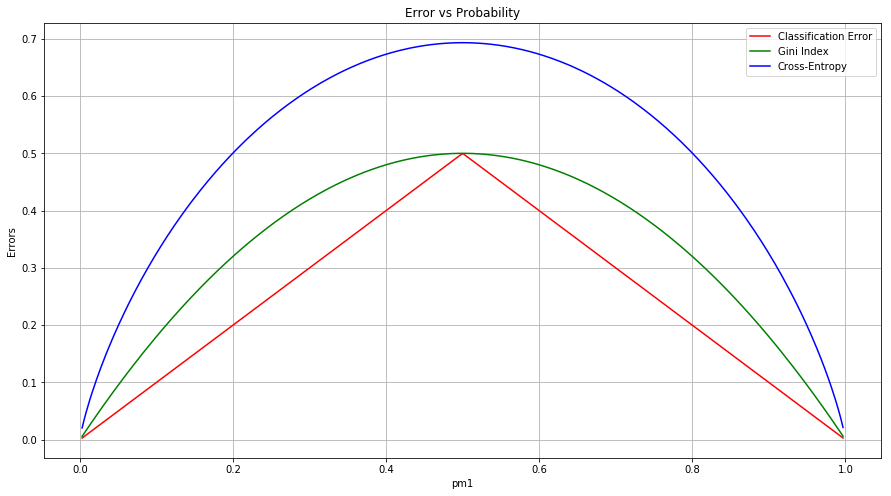

In [197]:
import numpy as np
import matplotlib.pyplot as plt

pm1 = np.random.uniform(0.0, 1.0, 1000) 
pm2 = 1 - pm1
E = 1 - np.maximum(pm1, pm2)
G = np.add(np.multiply(pm1, pm2), np.multiply(pm1, pm2))
D = np.add(-pm1 * np.log(pm1), -pm2 * np.log(pm2))

E_dict = {}
G_dict = {}
D_dict = {}
for idx, pm in enumerate(pm1):
    E_dict[pm] = E[idx]
    G_dict[pm] = G[idx]
    D_dict[pm] = D[idx]
    
fig = plt.figure(figsize=(15,8))
ax = fig.add_subplot(111)

lists = sorted(E_dict.items()) 
x, y = zip(*lists)
plt.plot(x, y, color='r', label='Classification Error')

lists = sorted(G_dict.items()) 
x, y = zip(*lists)
plt.plot(x, y, color='g', label='Gini Index')

lists = sorted(D_dict.items()) 
x, y = zip(*lists)
plt.plot(x, y, color='b', label='Cross-Entropy')

ax.set_xlabel('pm1')
ax.set_ylabel('Errors')
ax.set_title('Error vs Probability')

plt.legend()
plt.grid()
plt.show()

Q4. This question relates to the plots in Figure 8.12.

(a) Sketch the tree corresponding to the partition of the predictor space illustrated in the left-hand panel of Figure 8.12. The numbers inside the boxes indicate the mean of Y within each region.

(b) Create a diagram similar to the left-hand panel of Figure 8.12, using the tree illustrated in the right-hand panel of the same figure. You should divide up the predictor space into the correct regions, and indicate the mean for each region.

<b>Sol:</b> The diagrams are as follows:

<img src="images/Q8.4.PNG"  width="1000px">

Q5. Suppose we produce ten bootstrapped samples from a data set containing red and green classes. We then apply a classification tree to each bootstrapped sample and, for a specific value of X, produce 10 estimates of P(Class is Red|X):

    0.1, 0.15, 0.2, 0.2, 0.55, 0.6, 0.6, 0.65, 0.7, and 0.75.
    
There are two common ways to combine these results together into a single class prediction. One is the majority vote approach discussed in this chapter. The second approach is to classify based on the average probability. In this example, what is the final classification under each of these two approaches?

<b>Sol:</b> For majority vote, the final classification will be the class <b>Red</b>, as in 6 out of 10 cases, P(Class is Red|X) > P(Class is Green|X). Here $P_{avg}$(Class is Red|X) = 0.45 and $P_{avg}$(Class is Green|X) = 0.55. For the classification based on average probability, the final classification is <b>Green</b>.

#### Applied
Q 7. In the lab, we applied random forests to the Boston data using mtry=6 and using ntree=25 and ntree=500. Create a plot displaying the test error resulting from random forests on this data set for a more comprehensive range of values for mtry and ntree. You can model your plot after Figure 8.10. Describe the results obtained.

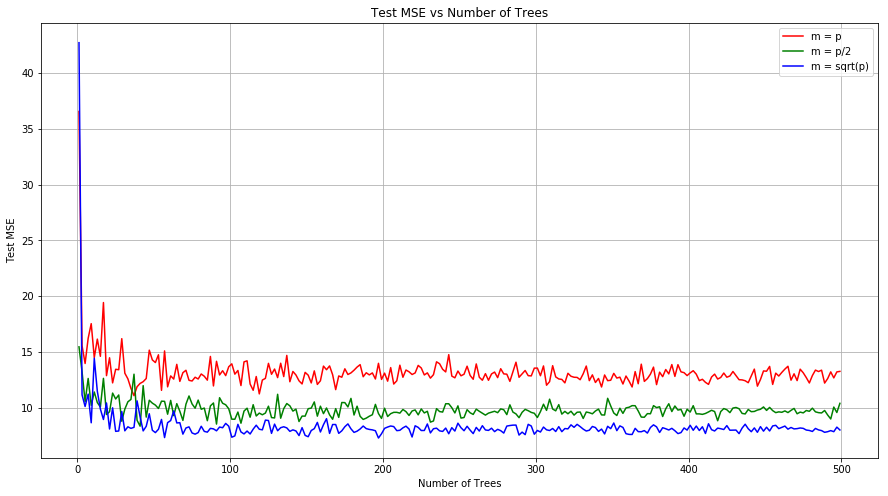

In [53]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from math import sqrt

boston = pd.read_csv("data/Boston.csv")
boston.dropna(inplace=True)

def random_forest_ntree(X_train, Y_train, X_test, Y_test, nTrees, max_feature):
    test_MSE = {}
    for nTree in nTrees:
        regr = RandomForestRegressor(max_features=max_feature, n_estimators=nTree)
        regr.fit(X_train, Y_train)
        p = regr.predict(X_test)
        test_MSE[nTree] = mean_squared_error(p, Y_test)
    return test_MSE

np.random.seed(5)
predictors = 13

X_train, X_test, y_train, y_test = train_test_split(boston.loc[:, boston.columns != 'medv'],
                                                    boston[['medv']], test_size=0.1)

test_MSE_p = random_forest_ntree(X_train, y_train.values.ravel(), X_test, y_test.values.ravel(), np.arange(1,300,5)
                                 , predictors)
test_MSE_pby2 = random_forest_ntree(X_train, y_train.values.ravel(), X_test, y_test.values.ravel(), np.arange(1,300,5)
                                 , int(predictors/2))
test_MSE_psqrt = random_forest_ntree(X_train, y_train.values.ravel(), X_test, y_test.values.ravel(), np.arange(1,300,5)
                                 , int(sqrt(predictors)))

fig = plt.figure(figsize=(15,8))
ax = fig.add_subplot(111)

lists = sorted(test_MSE_p.items()) 
x, y = zip(*lists)
plt.plot(x, y, color='r', label='m = p')

lists = sorted(test_MSE_pby2.items()) 
x, y = zip(*lists)
plt.plot(x, y, color='g', label='m = p/2')

lists = sorted(test_MSE_psqrt.items()) 
x, y = zip(*lists)
plt.plot(x, y, color='b', label='m = sqrt(p)')

ax.set_xlabel('Number of Trees')
ax.set_ylabel('Test MSE')
ax.set_title('Test MSE vs Number of Trees')

plt.grid(b=True)
plt.legend()
plt.show()

Q 8. In the lab, a classification tree was applied to the Carseats data set after converting Sales into a qualitative response variable. Now we will seek to predict Sales using regression trees and related approaches, treating the response as a quantitative variable.

(a) Split the data set into a training set and a test set.

In [70]:
carsets = pd.read_csv("data/Carsets.csv")
carsets['US'] = carsets['US'].map({'Yes': 1, 'No': 0})
carsets['Urban'] = carsets['Urban'].map({'Yes': 1, 'No': 0})
carsets = pd.get_dummies(carsets, prefix=['ShelveLoc'])
carsets = carsets.rename(columns={'Unnamed: 0': 'Id'})

X_train, X_test, y_train, y_test = train_test_split(carsets.drop(['Id', 'Sales'], axis=1),
                                                    carsets[['Sales']], test_size=0.1)

(b) Fit a regression tree to the training set. Plot the tree, and interpret the results. What test error rate do you obtain?

<b>Sol:</b> The stopping criteria used is: Split until there are more than 20 observations at a node. Reported test MSE is <b>2.6547</b>. The regression tree is displayed below.

<img src="images/Q8b.PNG"  width="1000px">

In [108]:
from sklearn.tree import DecisionTreeRegressor, export_graphviz

regressor = DecisionTreeRegressor(random_state=0, min_samples_split=20)
regressor.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=20, min_weight_fraction_leaf=0.0,
           presort=False, random_state=0, splitter='best')

In [109]:
def visualize_tree(tree, feature_names):
    """Create tree png using graphviz.

    Args
    ----
    tree -- scikit-learn DecsisionTree.
    feature_names -- list of feature names.
    """
    with open("dt.dot", 'w') as f:
        export_graphviz(tree, out_file=f,
                        feature_names=feature_names)

    command = ["dot", "-Tpng", "dt.dot", "-o", "dt.png"]
    try:
        subprocess.check_call(command)
    except:
        print("Could not run dot, ie graphviz, to "
             "produce visualization")
        
visualize_tree(regressor, X_train.columns.tolist())

p = regressor.predict(X_test)
print("Test MSE is: " + str(mean_squared_error(p, y_test)))

Could not run dot, ie graphviz, to produce visualization
Test MSE is: 2.6547338209551623


(c) Use cross-validation in order to determine the optimal level of tree complexity. Does pruning the tree improve the test error rate?

<b>Sol:</b> The optimal depth of tree is <b>8</b>. The test MSE obtained for the mode is <b>3.40359</b>.

In [187]:
from sklearn import tree
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, make_scorer

parameters = {'max_depth':range(1,30)}
mse_scorer = make_scorer(mean_squared_error, greater_is_better=False) 
clf = GridSearchCV(tree.DecisionTreeRegressor(random_state=1), parameters, n_jobs=4, cv=10, 
                   scoring=mse_scorer)
clf.fit(X=X_train, y=y_train)
tree_model = clf.best_estimator_
print (clf.best_score_, clf.best_params_) 

-4.917597820641044 {'max_depth': 8}


/Users/amitrajan/Desktop/PythonVirtualEnv/Python3_VirtualEnv/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/Users/amitrajan/Desktop/PythonVirtualEnv/Python3_VirtualEnv/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('std_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


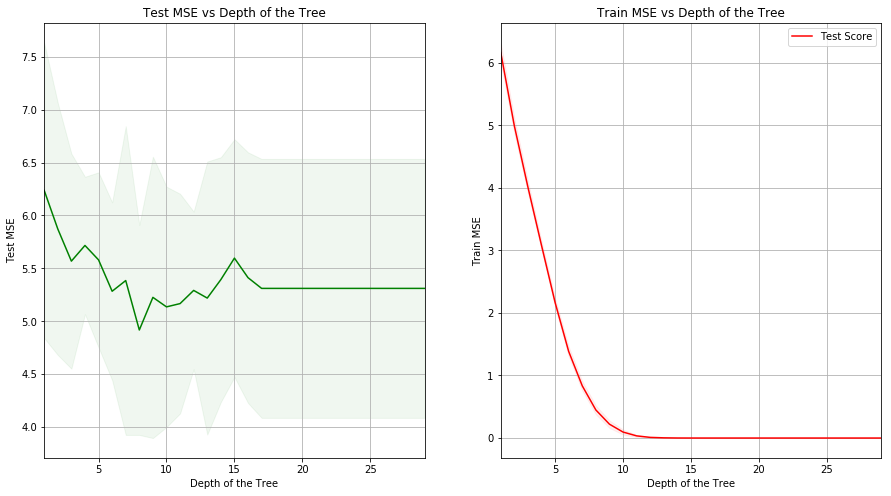

In [193]:
test_MSE = {}
test_MSE_std = {}
train_MSE = {}
train_MSE_std = {}
for idx, pm in enumerate(clf.cv_results_['param_max_depth'].data):
    test_MSE[pm] = abs(clf.cv_results_['mean_test_score'][idx]) # Taking absolute value as returned value of MSE is negative
    test_MSE_std[pm] = clf.cv_results_['std_test_score'][idx]
    train_MSE[pm] = abs(clf.cv_results_['mean_train_score'][idx])
    train_MSE_std[pm] = clf.cv_results_['std_train_score'][idx]
    
fig = plt.figure(figsize=(15,8))
ax = fig.add_subplot(121)

lists = sorted(test_MSE.items()) 
x, y = zip(*lists)

lists = sorted(test_MSE_std.items()) 
x1, y1 = zip(*lists)

plt.plot(x, y, color='g', label='Test Score')
plt.fill_between(x, np.subtract(y, y1), np.add(y, y1), alpha=0.06, color="g")
ax.set_xlabel('Depth of the Tree')
ax.set_ylabel('Test MSE')
ax.set_title('Test MSE vs Depth of the Tree')
ax.set_xlim([1, 29])
ax.grid()

ax = fig.add_subplot(122)
lists = sorted(train_MSE.items()) 
x, y = zip(*lists)

lists = sorted(train_MSE_std.items()) 
x1, y1 = zip(*lists)

plt.plot(x, y, color='r', label='Test Score')
plt.fill_between(x, np.subtract(y, y1), np.add(y, y1), alpha=0.06, color="r")
ax.set_xlabel('Depth of the Tree')
ax.set_ylabel('Train MSE')
ax.set_title('Train MSE vs Depth of the Tree')
ax.set_xlim([1, 29])
ax.grid()

plt.legend()
plt.show()

In [196]:
p = tree_model.predict(X_test)
print("Test MSE is: " + str(mean_squared_error(p, y_test)))

Test MSE is: 3.4035934469592464


(d) Use the bagging approach in order to analyze this data. What test error rate do you obtain? Use the importance() function to determine which variables are most important.

<b>Sol:</b> The obtained test MSE is <b>2.14596</b>. The pie-chart for importance of different features is shown as well.

In [220]:
from sklearn.ensemble import BaggingRegressor

bagging = BaggingRegressor(random_state=0)
bagging.fit(X=X_train, y=y_train.values.ravel())

BaggingRegressor(base_estimator=None, bootstrap=True,
         bootstrap_features=False, max_features=1.0, max_samples=1.0,
         n_estimators=10, n_jobs=1, oob_score=False, random_state=0,
         verbose=0, warm_start=False)

In [221]:
p = bagging.predict(X_test)
print("Test MSE is: " + str(mean_squared_error(p, y_test)))

Test MSE is: 2.145963949999999


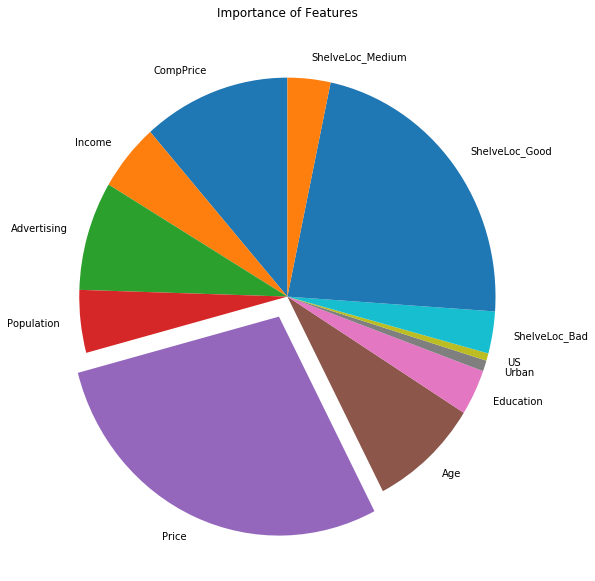

In [222]:
feature_importances = np.mean([tree.feature_importances_ for tree in bagging.estimators_], axis=0)
explode = (0, 0, 0, 0, 0.1, 0, 0, 0, 0, 0, 0, 0)

fig = plt.figure(figsize=(15,8))
ax = fig.add_subplot(121)

plt.pie(feature_importances, explode=explode, labels=X_train.columns.tolist(), startangle=90)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.tight_layout()
plt.title("Importance of Features")
plt.show()

(e) Use random forests to analyze this data. What test error rate do you obtain? Use the importance() function to determine which variables are most important. Describe the effect of m, the number of variables considered at each split, on the error rate obtained.

<b>Sol:</b> The test MSE for random forest regressor is <b>2.243</b>. Minimum test MSE is obtained when all the features are used for split.

In [231]:
from sklearn.ensemble import RandomForestRegressor

random_forest = RandomForestRegressor(random_state=0)
random_forest.fit(X=X_train, y=y_train.values.ravel())
p = random_forest.predict(X_test)
print("Test MSE is: " + str(mean_squared_error(p, y_test)))

Test MSE is: 2.243107725


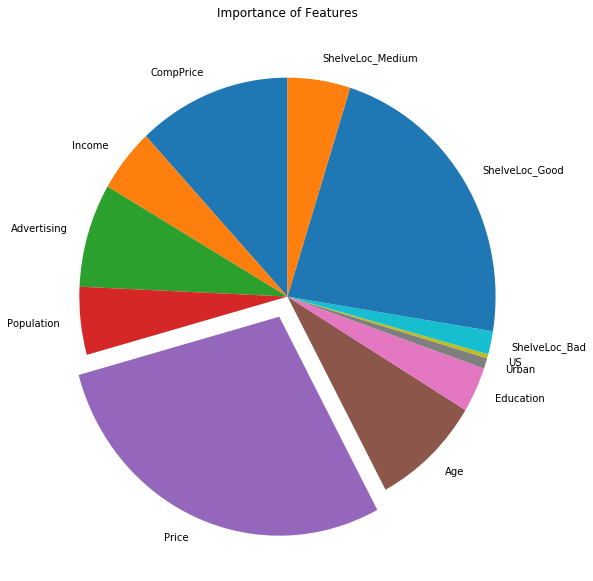

In [232]:
feature_importances = np.mean([tree.feature_importances_ for tree in random_forest.estimators_], axis=0)
explode = (0, 0, 0, 0, 0.1, 0, 0, 0, 0, 0, 0, 0)

fig = plt.figure(figsize=(15,8))
ax = fig.add_subplot(121)

plt.pie(feature_importances, explode=explode, labels=X_train.columns.tolist(), startangle=90)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.tight_layout()
plt.title("Importance of Features")
plt.show()

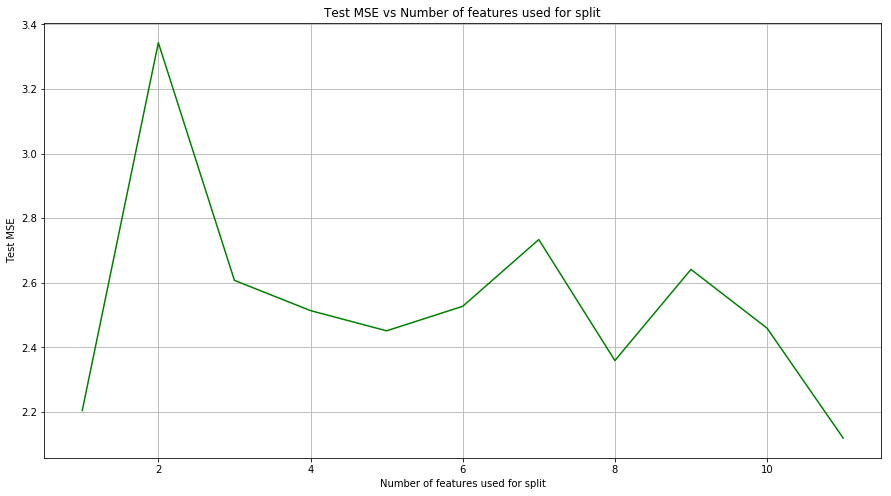

In [233]:
def random_forest_m(X_train, Y_train, X_test, Y_test, features):
    test_MSE = {}
    for m in features:
        regr = RandomForestRegressor(random_state=0, max_features=m)
        regr.fit(X_train, Y_train)
        p = regr.predict(X_test)
        test_MSE[m] = mean_squared_error(p, Y_test)
    return test_MSE

test_MSE = random_forest_m(X_train, y_train.values.ravel(), X_test, y_test.values.ravel(), 
                             np.arange(1,len(X_train.columns.tolist()),1))

fig = plt.figure(figsize=(15,8))
ax = fig.add_subplot(111)

lists = sorted(test_MSE.items()) 
x, y = zip(*lists)
plt.plot(x, y, color='g')

ax.set_xlabel('Number of features used for split')
ax.set_ylabel('Test MSE')
ax.set_title('Test MSE vs Number of features used for split')

plt.grid(b=True)
plt.show()